In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%matplotlib inline
#System Imports
import json
import glob
import os

#Library Imports
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
directory_name = "gdrive/MyDrive/Colab Notebooks/GESTALT/"

<ipython-input-15-367d0c8c69c6>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=-45)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

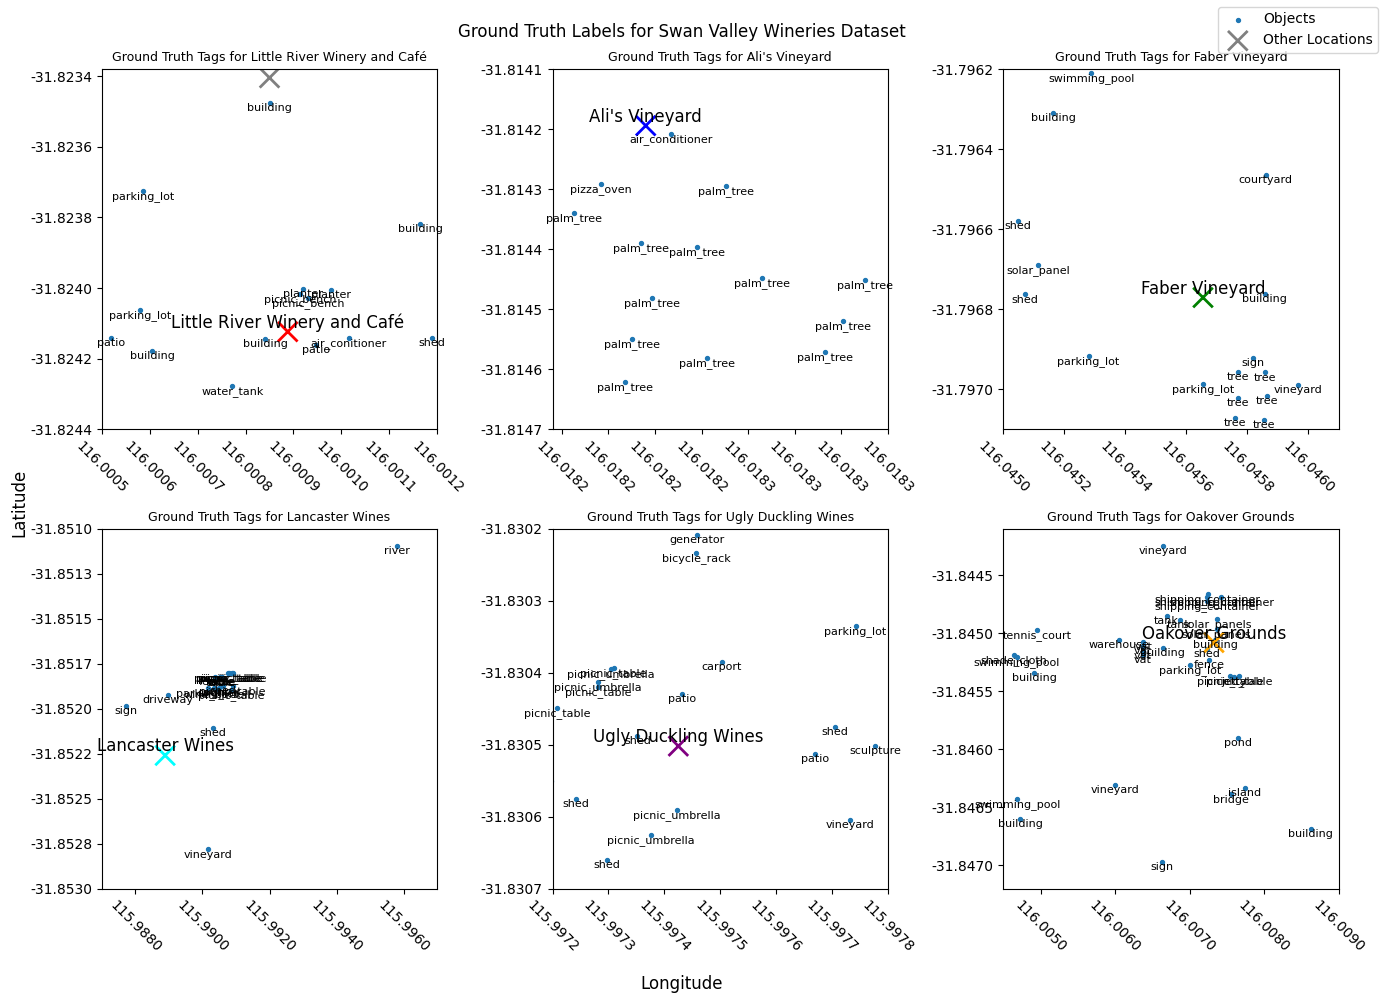

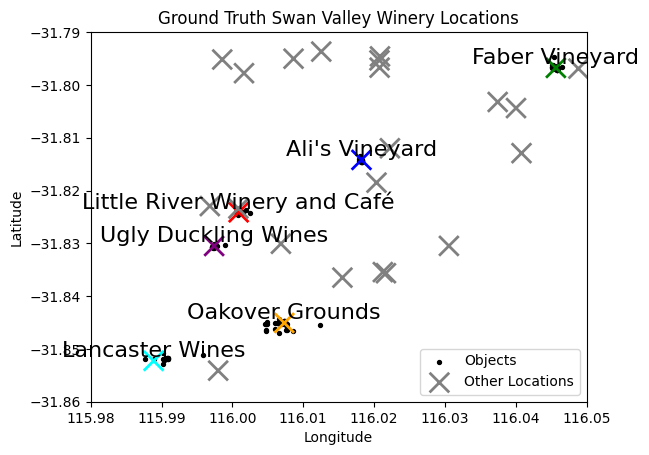

In [15]:
class ClusteringViz:
    def __init__(self, object_filename, location_filename):
        self.obj_df = pd.read_csv(object_filename)[['true_location','object','latitude','longitude']].copy()

        # Fix lat/long backwards
        temp = self.obj_df['longitude']
        self.obj_df['longitude'] = self.obj_df['latitude']
        self.obj_df['latitude'] = temp

        self.location_df = pd.read_csv(location_filename)[['location','latitude','longitude']].copy()
        temp = self.location_df['longitude']
        self.location_df['longitude'] = self.location_df['latitude']
        self.location_df['latitude'] = temp

        # Universal plotting prep
        self.xlim_dict = {"Ali's Vineyard":(116.01817, 116.01835), 'Little River Winery and Café':(116.0005, 116.0012), 'Ugly Duckling Wines':(115.9972, 115.9978), 'Oakover Grounds':(116.0045, 116.009), 'Faber Vineyard':(116.045, 116.0461), 'Lancaster Wines':(115.987, 115.997), 'ALL':(115.98, 116.05) }
        self.ylim_dict = {"Ali's Vineyard":(-31.8147, -31.8141), 'Little River Winery and Café':(-31.8244, -31.82338), 'Ugly Duckling Wines':(-31.8307, -31.8302), 'Oakover Grounds':(-31.8472, -31.8441), 'Faber Vineyard':(-31.7971, -31.7962), 'Lancaster Wines':(-31.853, -31.8510), 'ALL':(-31.86, -31.79)}

        self.color_dict = defaultdict(lambda : "gray")
        self.color_dict.update({"Ali's Vineyard":"blue", 'Little River Winery and Café':"red", 'Faber Vineyard':"green", 'Ugly Duckling Wines':"purple", 'Oakover Grounds':"orange", 'Lancaster Wines':"cyan"})

    def plot_object_locations(self, loc_name, ax):
        # Plot labels
        ax.set_title('Ground Truth Tags for ' + loc_name, fontsize=9)

        # Control zoom of plot
        ax.set_xlim(self.xlim_dict[loc_name])
        ax.set_ylim(self.ylim_dict[loc_name])

        # Fix scientific notation on axes
        ax.ticklabel_format(useOffset=False)
        ax.set_xticklabels(ax.get_xticks(), rotation=-45)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

        # Plot objects
        ax.scatter(y=self.obj_df['latitude'], x=self.obj_df['longitude'], label="Objects", linewidth=1, s=8)

        # Plot locations
        ax.scatter(y=self.location_df['latitude'], x=self.location_df['longitude'], marker='x', label='Locations', color=[self.color_dict[i] for i in self.location_df['location']], linewidth=2, s=[200 for i in self.location_df['location']])

        # Annotations
        for i, txt in enumerate(self.obj_df['object']):
            ax.annotate(txt, (self.obj_df['longitude'][i], self.obj_df['latitude'][i]), size=8, va='top', ha='center')

        for i, txt in enumerate(self.location_df['location']):
            if txt in ["Ali's Vineyard", 'Little River Winery and Café', 'Faber Vineyard', 'Ugly Duckling Wines', 'Oakover Grounds', 'Lancaster Wines']:
                ax.annotate(txt, (self.location_df['longitude'][i], self.location_df['latitude'][i]), size=12, ha='center', va='bottom')

    def plot_locations(self, loc_name, title):
        # Plot labels
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(title)

        # Control zoom of plot
        plt.xlim(self.xlim_dict[loc_name])
        plt.ylim(self.ylim_dict[loc_name])

        # Fix scientific notation on axes
        plt.ticklabel_format(useOffset=False)

        # Plot objects
        plt.scatter(y=self.obj_df['latitude'], x=self.obj_df['longitude'], label="Objects", color='black', linewidth=1, s=8)

        # Plot locations
        plt.scatter(y=self.location_df['latitude'], x=self.location_df['longitude'], marker='x', label='Locations', color=[self.color_dict[i] for i in self.location_df['location']], linewidth=2, s=[200 for i in self.location_df['location']])

        # Legend
        plt.legend(['Objects', 'Other Locations'], loc='lower right')

        # Annotations
        for i, txt in enumerate(self.location_df['location']):
            if txt in ["Ali's Vineyard", 'Little River Winery and Café', 'Faber Vineyard', 'Ugly Duckling Wines', 'Oakover Grounds', 'Lancaster Wines']:
                plt.annotate(txt, (self.location_df['longitude'][i], self.location_df['latitude'][i]), size=16, ha='center', va='bottom')



if __name__ == "__main__":
    viz = ClusteringViz(directory_name+'/data/nic_output/ownershipAssignment/obj_df.csv', directory_name+'/data/nic_output/ownershipAssignment/osm_df.csv')  #locations.csv

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(14,10))
    fig.tight_layout(pad=3.0)

    viz.plot_object_locations("Little River Winery and Café", ax1)#'Little River Winery and Café')#'Ugly Duckling Wines')#'Oakover Grounds')#'Lancaster Wines')#'Faber Vineyard')
    viz.plot_object_locations("Ali's Vineyard", ax2)
    viz.plot_object_locations("Faber Vineyard", ax3)
    viz.plot_object_locations("Lancaster Wines", ax4)
    viz.plot_object_locations("Ugly Duckling Wines", ax5)
    viz.plot_object_locations("Oakover Grounds", ax6)

    fig.suptitle('Ground Truth Labels for Swan Valley Wineries Dataset')
    fig.supxlabel('Longitude')
    fig.supylabel('Latitude')
    fig.legend(['Objects', 'Other Locations'], loc='upper right')
    fig.tight_layout()

    plt.savefig("loc_obj_labels_plot.png")
    files.download("loc_obj_labels_plot.png")

    plt.figure()
    fig = viz.plot_locations("ALL", title='Ground Truth Swan Valley Winery Locations')
    plt.savefig("loc_labels_plot.png")
    files.download("loc_labels_plot.png")